In [13]:
#connect to PI Server
import  PIconnect as PI
from  PIconnect.PIConsts import SummaryType

#manage time
import pytz
from datetime import datetime

#stardard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
# make connection to the PI database
with PI.PIAFDatabase() as db:
    print(f"Connected to {db.server_name}")

# locations for a  couple of PI attributes.  Will use N PAA Chemscan analyzers as they have good amount of data, redundancy, and seasonality.
PAA_Chemscan = r"Hite Treatment Plant\07-Disinfection\Dis_PAA\North_PAA\North_PAA_Analyzers\N PAA Analyzers_Upstream\ChemScans"

PAA_chemscan2_attr = r"Hite Treatment Plant\07-Disinfection\Dis_PAA\North_PAA\North_PAA_Analyzers\N PAA Analyzers_Upstream\ChemScans|ChemScan Upstream #2"

PAA_element = db.descendant(PAA_Chemscan)

df_PAA1 = PAA_element.attributes['ChemScan Upstream #1'].summaries("-30d", "00:00", "5m", SummaryType.AVERAGE)

df_PAA2 = PAA_element.attributes['ChemScan Upstream #2'].summaries("-30d", "00:00", "5m", SummaryType.AVERAGE)



Connected to APPLEPI_AF


In [25]:
def PI_data_pull(ele_path: str):
    """_summary_

    Args:
        ele_path (_type_): _description_
    """
    # make connection to PI database:
    try:
        with PI.PIAFDatabase() as db:
            print(f'connected to {db.server_name}')
    except:
        print("Could not connect to the server")
    
    # check parameters
    if not isinstance(ele_path, str):
        raise TypeError("ele_path needs to be a string")
    return ele_path

In [27]:
PI_data_pull(ele_path =r"Hite Treatment Plant\07-Disinfection\Dis_PAA\North_PAA\North_PAA_Analyzers\N PAA Analyzers_Upstream\ChemScans|ChemScan Upstream #1")

connected to APPLEPI_AF


'Hite Treatment Plant\\07-Disinfection\\Dis_PAA\\North_PAA\\North_PAA_Analyzers\\N PAA Analyzers_Upstream\\ChemScans|ChemScan Upstream #1'

In [39]:
df_PAA1

,AVERAGE
2025-03-10 06:00:00+00:00,1.632187
2025-03-10 06:05:00+00:00,1.647074
2025-03-10 06:10:00+00:00,1.631687
2025-03-10 06:15:00+00:00,1.563413
2025-03-10 06:20:00+00:00,1.528437
...,...
2025-04-09 05:35:00+00:00,1.158437
2025-04-09 05:40:00+00:00,1.104082
2025-04-09 05:45:00+00:00,1.131419
2025-04-09 05:50:00+00:00,1.375205


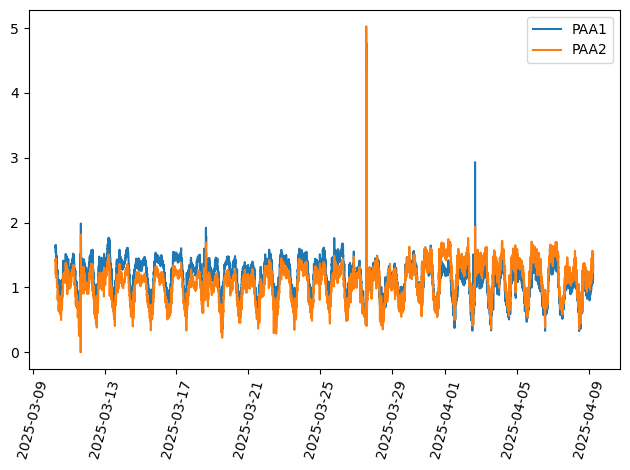

In [48]:
plt.plot(df_PAA1['AVERAGE'], label= "PAA1")
plt.plot(df_PAA2['AVERAGE'], label = "PAA2")
plt.xticks(rotation = 75)
plt.legend()
plt.tight_layout()
plt.show()
